In [1]:
# get some data - this is not in the book
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [3]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [4]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [5]:
cumsum

array([0.98204467, 0.99822116])

In [6]:
d

1

In [37]:
pca = PCA(n_components = 5)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered

array([[1.81317282e+01, 1.13513609e+01, 1.23635322e+02, ...,
        2.96090513e-01, 4.23267768e-01, 1.24628265e-01],
       [2.03991280e+01, 1.77052194e+01, 1.32762799e+02, ...,
        1.55485275e-01, 2.67391732e-01, 6.80952964e-02],
       [1.94165656e+01, 2.00598664e+01, 1.27948409e+02, ...,
        1.73637356e-01, 2.90379607e-01, 7.93986072e-02],
       ...,
       [1.64137339e+01, 2.61796380e+01, 1.08021342e+02, ...,
        1.54224616e-01, 3.06104000e-01, 8.79317460e-02],
       [2.13457176e+01, 2.87826306e+01, 1.43889717e+02, ...,
        2.82468784e-01, 3.80957714e-01, 1.08034395e-01],
       [8.47599685e+00, 2.32980335e+01, 5.21813815e+01, ...,
        9.38513449e-03, 2.47382417e-01, 7.66639099e-02]])

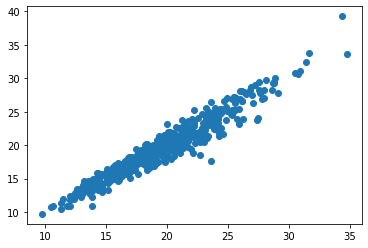

In [29]:
# comparing X vs X_recovered - not in the book this way
import matplotlib.pyplot as plt
plt.scatter(X_recovered[:,1], X[:,1])
plt.show()

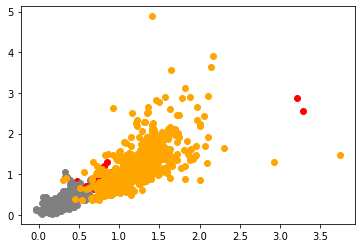

In [30]:
# several other columns
plt.scatter(X_recovered[:,10], X[:,10], c='red')
plt.scatter(X_recovered[:,25], X[:,25], c='gray')
plt.scatter(X_recovered[:,11], X[:,11], c='orange')
plt.show()

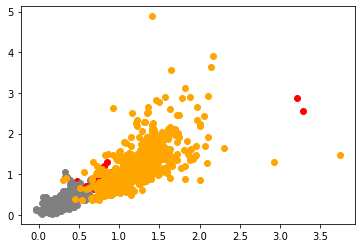

In [33]:
# supposed to be faster but no difference visually
rnd_pca = PCA(n_components=5, svd_solver="randomized")
X_reduced_ = rnd_pca.fit_transform(X)
X_recovered_ = rnd_pca.inverse_transform(X_reduced_)

plt.scatter(X_recovered_[:,10], X[:,10], c='red')
plt.scatter(X_recovered_[:,25], X[:,25], c='gray')
plt.scatter(X_recovered_[:,11], X[:,11], c='orange')
plt.show()

In [38]:
# Incremental PCA

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=5)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X)
    
X_reduced_i = inc_pca.transform(X)

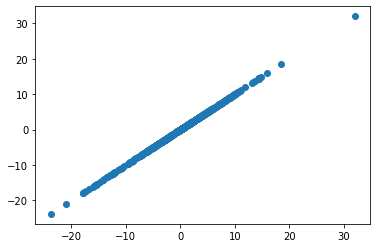

In [45]:
plt.scatter(X_reduced_[:,4], X_reduced[:,4])

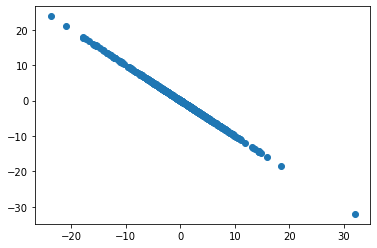

In [49]:
# incremental seems to be inverse... interesting
plt.scatter(X_reduced[:,4], X_reduced_i[:,4])

In [50]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

y = breast.target

clf = Pipeline([
    ("kpca", KernelPCA(n_components=3)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.01, 0.10, 10),
    "kpca__kernel": ["rbf","sigmoid"]
}]

In [86]:
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=3)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [89]:
grid_search.best_params_

{'kpca__gamma': 0.01, 'kpca__kernel': 'rbf'}

In [90]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)

In [91]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [92]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

1.8670210795354725e-23

In [93]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)